## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Do not write your name on the assignment.

3. Write your code in the **Code cells** and your answers in the **Markdown cells** of the Jupyter notebook. Ensure that the solution is written neatly enough to for the graders to understand and follow.

4. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to render the **.ipynb** file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

5. There is a **bonus** question worth 15 points.

6. **Five points are properly formatting the assignment**. The breakdown is as follows:
    - Must be an HTML file rendered using Quarto **(1 point)**. *If you have a Quarto issue, you must mention the issue & quote the error you get when rendering using Quarto in the comments section of Canvas, and submit the ipynb file.* 
    - No name can be written on the assignment, nor can there be any indicator of the student’s identity—e.g. printouts of the working directory should not be included in the final submission.  **(1 point)**
    - There aren’t excessively long outputs of extraneous information (e.g. no printouts of entire data frames without good reason, there aren’t long printouts of which iteration a loop is on, there aren’t long sections of commented-out code, etc.) **(1 point)**
    - Final answers to each question are written in the Markdown cells. **(1 point)**
    - There is no piece of unnecessary / redundant code, and no unnecessary / redundant text. **(1 point)**

7.  The maximum possible score in the assigment is 100 + 15 (bonus question) + 5 (proper formatting) = 120 out of 100. There is no partial credit for some parts of the bonus question.

## 1) Case Studies: Regression vs Classification and Prediction vs Inference (16 points)

For each case below, explain (1) whether it is a classification or a regression problem and (2) whether the main purpose is prediction or inference. **You need justify your answers for credit.** 

### 1a)
You work for a company that is interested in conducting a marketing campaign. The goal of your project is to identify individuals who are likely to respond positively to a marketing campaign, based on observations of demographic variables (such as age, gender, income etc.) measured on each individual. **(2+2 points)**

This is a classification problem with the purpose of prediction. The project aims to classify individuals by their likelihood to respond positively to a marketing campaign by certain demographic variables. The project seeks to predict the behavior of all individuals and specifically identify the ones whom they predict will respond positively, making it a prediction problem.

### 1b)
For the same company, now you are working on a different project. This one is focused on understanding the impact of advertisements in different media types on the company sales. For example, you are interested in the following question: *'How large of an increase in sales is associated with a given increase in radio and TV advertising?'* **(2+2 points)**

This is a regression problem since we are trying to find the size of the increase in sales corresponding to a unit increase in advertising. It is an inference problem because we are trying to find a relationship in the data -- one between advertising and sales.

### 1c) 
A company is selling furniture and they are interested in the finding the association between demographic characteristics of customers (such as age, gender, income etc.) and if they would purchase a particular company product. **(2+2 points)**

This is a classification problem since we're trying to categorize customers into groups of whether or not they'd purchase the product, based on certain characteristics. Since we're trying to understand the association and not predict the behavior of future customers, this is an inference problem.

### 1d)
We are interested in forecasting the % change in the USD/Euro exchange rate using the weekly changes in the stock markets of a number of countries. We collect weekly data for all of 2023. For each week, we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market. **(2+2 points)**

This is a regression problem since we're trying to find the percent change in the exchange rate corresponding to the percent changes in these three markets. Since we're trying to forecast future movement, this is a prediction problem.

## 2) Examples for Different Regression Metrics: RMSE vs MAE (8 points)

### 2a) 
Describe a regression problem, where it will be more proper to evaluate the model performance using the root mean squared error (RMSE) metric as compared to the mean absolute error (MAE) metric. **You need to justify your answer for credit.** **(4 points)**

**Note:** You are not allowed to use the datasets and examples covered in the lectures.

Suppose that researchers are trying to find the association between the delta of a particular option and the option's trading volume. For financial problems like this, we want to avoid large errors because skewing a model with large deviations and acting on that skewed and thus unrepresentative model would thus result in financial loss. Therefore, RMSE is a more appropriate metric to evaluate model performance than MAE as it is more sensitive to outliers and penalizes them more.

### 2b) 
Describe a regression problem, where it will be more proper to evaluate the model performance using the mean absolute error (MAE) metric as compared to the root mean squared error (RMSE) metric. **You need to justify your answer for credit.** **(4 points)**

**Note:** You are not allowed to use the datasets and examples covered in the lectures.

Suppose that researchers are trying to find the association between years of education and lifetime earnings and model the association with a linear regression model. In this case, evaluating model performance with MAE compared to RMSE would be appropriate because of the existence of significant outliers. The outliers would be the richest people on Earth who have a seemingly unassuming level of education (4 year degree) but whose incomes deviate so far from the rest of the data. To avoid these outliers dramatically skewing the error measurement, we should take the MAE since it doesn't square the errors.

## 3) Simple Linear Regression: Formulation (3 points)

When asked to state the simple linear regression model, a students wrote it as follows: $E(Y_i) = \beta_0 + \beta_1X_i + \epsilon_i$. Is this correct **(1 point)**? Justify your answer **(2 points)**.

This is incorrect: the linear model calculates $Y_i$, not $E(Y_i)$. Taking the expectation of both sides of the linear regression model $Y_i = \beta_0 + \beta_1X_i + \epsilon_i$, we should get $E(Y_i) = \beta_0 + \beta_1X_i$ because we assume that the expected value of the irreducible error $\epsilon_i$ is 0.

## 4) Modeling the Petrol Consumption in U.S. States (58 points)

Read **petrol_consumption_train.csv**. Assume that each observation is a U.S. state. For each observation, the data has the following variables as its five columns: 

`Petrol_tax`: Petrol tax (cents per gallon) 

`Per_capita_income`: Average income (dollars) 

`Paved_highways`: Paved Highways (miles) 

`Prop_license`: Proportion of population with driver's licenses 

`Petrol_consumption`: Consumption of petrol (millions of gallons)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

petrol_train = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-2/Datasets/petrol_consumption_train.csv")
petrol_train.head()

,Petrol_tax,Per_capita_income,Paved_highways,Prop_license,Petrol_consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


### 4a) 
Create a pairwise plot of all the variables in the dataset. **(1 point)** Print the correlation matrix of all the variables as well. **(1 point)** Which variable has the highest linear correlation with `Petrol_consumption`? **(1 point)**

**Note:** Remember that a pairwise plot is a visualization tool that you can find in the seaborn library.

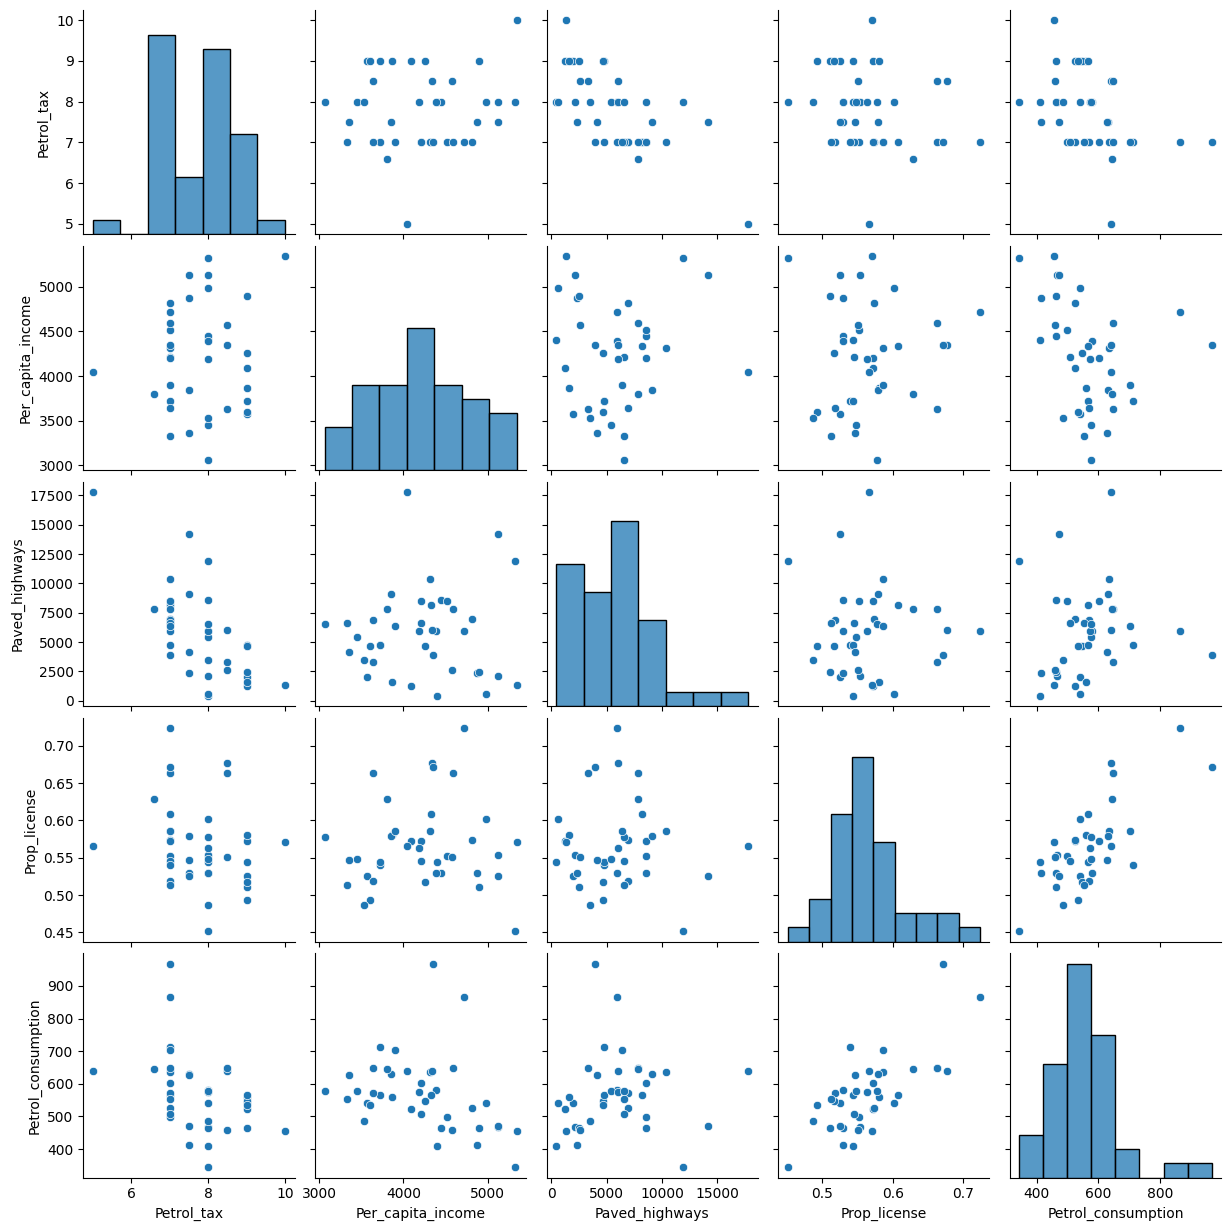

In [2]:
sns.pairplot(petrol_train);

In [3]:
# print correlation matrix
petrol_train.corr()

,Petrol_tax,Per_capita_income,Paved_highways,Prop_license,Petrol_consumption
Petrol_tax,1.000000,0.082359,-0.660022,-0.223920,-0.393415
Per_capita_income,0.082359,1.000000,0.040256,0.048153,-0.314039
Paved_highways,-0.660022,0.040256,1.000000,-0.037998,0.098117
Prop_license,-0.223920,0.048153,-0.037998,1.000000,0.718303
Petrol_consumption,-0.393415,-0.314039,0.098117,0.718303,1.000000


Prop_license has the highest linear correlation with Petrol_consumption

### 4b) 
Fit a simple linear regression model to predict `Petrol_consumption` using the column you found in **part a** as the only predictor. Print the model summary. **(3 points)**

In [4]:
ols_object = smf.ols(formula = "Petrol_consumption~Prop_license", data = petrol_train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_consumption   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     40.51
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           1.80e-07
Time:                        16:34:15   Log-Likelihood:                -231.59
No. Observations:                  40   AIC:                             467.2
Df Residuals:                      38   BIC:                             470.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -267.6155    132.038     -2.027      0.050    -534.912      -0.319
Prop_license  1479.1803    232.414      6.364      0.000    1008.682    1949.678
==============================================================================
Omnibus:                        5.963   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                4.620
Skew:                           0.762   Prob(JB):                       0.0993
Kurtosis:                       3.670   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4c) 
When asked for a point estimate of the expected petrol consumption for a state where the proportion of population with driver's license is 54.4\%, a person gave the estimate 488 million gallons because that is the mean value of `Petrol_consumption` for the two observations of `Prop_license = 0.544` pieces in the dataset. Is there an issue with this approach? Explain. **(2 points)** If there is an issue, then suggest a better approach and use it to estimate the expected petrol consumption for a state where the proportion of population with driver's license is 54.4\%. **(2 points)**

This approach is incorrect since it ignores the overall relationship between Prop_license and Petrol_consumption and instead bases the point estimate solely on the values of the two observations, which could be wildly inaccurate or otherwise subject to significant variance. A better approach would be to plug 0.544 and the values for $\beta_0$ and $\beta_1$ we found through the regression model into $Y_i = \beta_0 + \beta_1X_i$ to find the corresponding $Y_i$ value.

In [17]:
point_estimate = 0.544*model.params["Prop_license"] + model.params["Intercept"]
print(point_estimate)

537.0585613839467


### 4d) 
What is the increase in petrol consumption for an increase of 0.05 in the predictor? **(3 points)**

In [5]:
beta_1 = model.params["Prop_license"]
increase = beta_1*0.05
print(increase)

73.95901660689238


### 4e)
Does petrol consumption have a statistically significant relationship with the predictor? **You need to justify your answer for credit**. **(3 points)**

Petrol consumption has a statistically significant relationship with Prop_license because the p-value for the coefficient of Prop_license is 0, allowing us to reject the null hypothesis that $\beta_1 = 0$. We thus conclude that there is a statistically significant relationship between the predictor and response.

### 4f) 
How much of the variation in petrol consumption can be explained by its linear relationship with the predictor? **(2 points)**

51.6% of the variation in petrol consumption can be explained by its linear relationship with the predictor because the $R^2$ value is 0.516.

### 4g) 
Predict the petrol consumption for a state in which 50% of the population has a driver’s license. **(2 points)** What are the confidence interval **(2 points)** and the prediction interval **(2 points)** for your prediction? Which interval is wider? **(1 points)** Why? **(2 points)** 

In [6]:
beta_0 = model.params["Intercept"]
pred = beta_0 + beta_1*0.5
print(pred)

471.97462676988135


In [7]:
new_data = pd.DataFrame({"Prop_license": [0.5]})
prediction = model.get_prediction(new_data)
conf_int = prediction.conf_int()
print(conf_int)

[[431.69679993 512.25245361]]


In [8]:
summary_frame = prediction.summary_frame(alpha = 0.05)
confidence_interval = summary_frame[['mean_ci_lower', 'mean_ci_upper']].iloc[0]
print(confidence_interval)
prediction_interval = summary_frame[["obs_ci_lower", "obs_ci_upper"]].iloc[0]
print(prediction_interval)

mean_ci_lower    431.696800
mean_ci_upper    512.252454
Name: 0, dtype: float64
obs_ci_lower    302.822725
obs_ci_upper    641.126528
Name: 0, dtype: float64


The prediction interval is wider because it incorporates both the error in estimating Y (model uncertainty) and the variation in the response data that is not explained by the model (irreducible error), in order to provide a range for an individual observation. This contrasts with confidence intervals, which provide a range for the mean response, and thus only account for the model uncertainty.

### 4h)
Predict the petrol consumption for a state in which 10% of the population has a driver’s license. **(3 points)** Are you getting a reasonable outcome? **(1 point)** Why or why not? **(2 points)**

In [9]:
point_est = beta_0 + 0.1*beta_1
print(point_est)


-119.69750608525763


In [10]:
# print range of petrol_train["Prop_license"]
print(petrol_train["Prop_license"].min())
print(petrol_train["Prop_license"].max())

0.451
0.724


I am not getting a reasonable outcome (I got a negative number and petrol consumption can never be negative). This is because the range of Prop_license that I fitted the regression model on is between 0.451 and 0.724. Thus, when I plug in a value like 0.1 that is outside the range of observed data used to fit the model, the model extrapolates the relationship it found for points [0.451, 0.724] to points outside that range that may not follow that relationship and in this case, 0.1 doesn't. 

### 4i) 
What is the residual standard error of the model? **(3 points)**

In [30]:
np.sqrt(model.mse_resid)


np.float64(81.15342760294637)

### 4j) 
Using the trained model, predict the petrol consumption of the observations in **petrol_consumption_test.csv** **(2 points)** and find the RMSE. **(2 points)** What is the unit of this RMSE value? **(1 point)** 

In [12]:
petrol_test = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-2/Datasets/petrol_consumption_test.csv")
pred_petrol_consumption = model.predict(petrol_test)
rmse = np.sqrt(((petrol_test["Petrol_consumption"] - pred_petrol_consumption)**2).mean())
print(rmse)

80.13903941152408


The unit of the RMSE value is the same unit as Petrol_consumption.

### 4k) 
Based on the answers to **part i** and **part j**, do you think the model is overfitting? **You need to justify your answer for credit.** **(3 points)**

The model is not overfitting because its RSE on training data (81) is very close to its RMSE on unseen data (80), meaning its performance on train data is highly comparable to its performance on test data.

### 4l) 
Make a scatterplot of `Petrol_consumption` vs. the predictor using **petrol_consumption_test.csv**. **(1 point)** Over the scatterplot, plot the regression line **(1 point)**, the prediction interval **(2 points)**, and the confidence interval. **(2 points)** 

Make sure that regression line, prediction interval lines, and confidence interval lines have different colors. **(1 point)** Display a legend that correctly labels the lines as well. **(1 point)** Note that you need two lines of the same color to plot an interval.

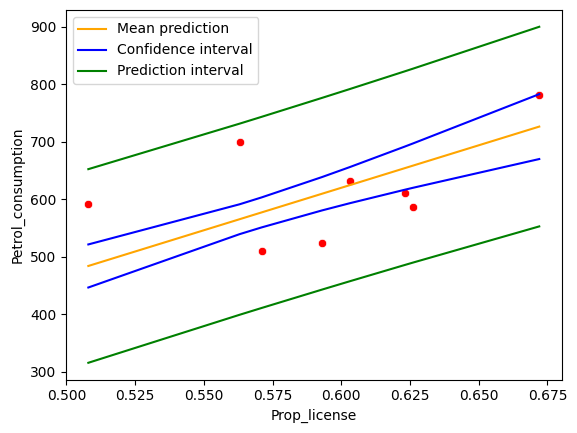

In [13]:
predictions = model.get_prediction(petrol_test)
predictions_table = predictions.summary_frame()

ax = sns.scatterplot(x = petrol_test["Prop_license"], y = petrol_test["Petrol_consumption"], color = "red");
sns.lineplot(x =petrol_test["Prop_license"], y = pred_petrol_consumption, color = "orange" )
sns.lineplot(x =petrol_test["Prop_license"], y = predictions_table.mean_ci_lower, color = "blue")
sns.lineplot(x =petrol_test["Prop_license"], y = predictions_table.mean_ci_upper, color = "blue")
sns.lineplot(x =petrol_test["Prop_license"], y = predictions_table.obs_ci_lower, color = "green")
sns.lineplot(x =petrol_test["Prop_license"], y = predictions_table.obs_ci_upper, color = "green")

legend_elements = [Line2D([0], [0], color='orange', label='Mean prediction'),
                   Line2D([0], [0], color='blue', label='Confidence interval'),
                  Line2D([0], [0], color='green', label='Prediction interval')]
ax.legend(handles=legend_elements, loc='upper left')


### 4m)
The dataset consists of 40 US States. If you combine this data with the data of the remaining 10 US States, are you likely to obtain narrower confidence and prediction intervals in the plot developed in the previous question, for the same level of confidence? Justify your answer. **(2 points)**. 

If yes, then can you gaurantee that the width of these intervals will reduce? Justify your answer. If no, then can you gaurantee that the width of these intervals will not reduce? Justify your answer. **(2 points)**

Assuming the data from the remaining 10 states is independent and identically distributed, adding it will likely reduce the width of the confidence and prediction intervals for the same level of confidence. This is because more data increases the precision of the estimates of the parameters of the model, thus narrowing the confidence and prediction intervals.

### 4n)
Find the correlation between `Petrol_consumption` and the rest of the variables in **petrol_consumption_train.csv**. Which column would have the lowest R-squared value when used as the predictor for a Simple Linear Regression model to predict `Petrol_consumption`? Note that you can directly answer this question from the correlation values and do not need to develop any more linear regression models. **(2 points)**

In [16]:
corrs = petrol_train.corr()["Petrol_consumption"]
print(corrs)

Petrol_tax           -0.393415
Per_capita_income    -0.314039
Paved_highways        0.098117
Prop_license          0.718303
Petrol_consumption    1.000000
Name: Petrol_consumption, dtype: float64


Paved_highways would have the lowest $R^2$ value because it has the smallest correlation coefficient by magnitude.

## 5) Reproducing the Results with Scikit-Learn (15 points)

### 5a)
Using the same datasets, same response and the same predictor as **Question 4**, reproduce the following outputs with scikit-learn:

- Model RMSE for test data **(3 points)**
- R-squared value of the model **(3 points)**
- Residual standard error of the model **(3 points)**

**Note that you are only allowed to use scikit-learn, pandas, and numpy tools for this question. Any other libraries will not receive any credit.**

In [32]:
model_skl = LinearRegression()

x_train = petrol_train[["Prop_license"]]
y_train = petrol_train["Petrol_consumption"]

model_skl.fit(x_train,y_train)

x_test = petrol_test[["Prop_license"]]
y_test = petrol_test["Petrol_consumption"].to_numpy()

y_pred = model_skl.predict(x_test)

test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print("Model RMSE for test data: ", test_rmse)

y_pred_train = model.predict(x_train)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred)
print("Train R^2: ", train_r2)
print("Test R^2: ", test_r2)

resids = y_train - y_pred_train
rss = np.sum(resids**2)
n = len(y_train)
p = x_train.shape[1] + 1
rse = np.sqrt(rss / (n - p))
print("RSE: ", rse)

Model RMSE for test data:  80.13903941152402
Train R^2:  0.5159591573694481
Test R^2:  0.08084083229313976
RSE:  81.15342760294637


### 5b)
Which of the model outputs from **Question 4** cannot be reproduced using scikit-learn? Give two answers. **(2+2 points)** What does this tell about scikit-learn? **(2 points)**

The t-statistics and p-values can't be reproduced using scikit-learn. This tells us that scikit-learn may not be the best option for inference problems where we are trying to learn more about a relationship between variables in great detail.

## 6) Bonus Question (15 points)

Please note that the bonus question requires you to look more into the usage of the tools we covered in class and it will be necessary to do your own research. We strongly suggest attempting it after you are done with the rest of the assignment. 

### 6a)
Fit a simple linear regression model to predict `Petrol_consumption` based on the predictor in **Question 4**, but **without an intercept term**. **(5 points - no partial credit)**

Without an intercept means that the equation becomes $Y = \beta_1X$. The intercept term, $\beta_0$, becomes 0.

**Note: You must answer this part correctly to qualify for the bonus points in the following parts.**

In [38]:
model_noint = sm.OLS(y_train, x_train).fit()
print("Coefficient: ", model_noint.params["Prop_license"])


Coefficient:  1010.3503904411267


### 6b) 
Predict the petrol consumption for the observations in **petrol_consumption_test.csv** using the model without an intercept and find the RMSE. **(1+2 points)** Then, print the summary and find the R-squared. **(2 points)**

In [39]:
y_pred_noint = model_noint.predict(x_test)
test_rmse_noint = np.sqrt(np.mean((y_pred_noint - y_test)**2))
print("Test RMSE: ", test_rmse_noint)

model_noint.summary()

Test RMSE:  76.39874449255201


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Petrol_consumption   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              1853.
Date:                Mon, 20 Jan 2025   Prob (F-statistic):                    1.71e-34
Time:                        17:07:13   Log-Likelihood:                         -233.64
No. Observations:                  40   AIC:                                      469.3
Df Residuals:                      39   BIC:                                      471.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Prop_license  1010.3504     23.469     43.051      0.000     962.880    1057.821
==============================================================================
Omnibus:                       13.327   Durbin-Watson:                   0.991
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.181
Skew:                           1.081   Prob(JB):                     0.000505
Kurtosis:                       5.105   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model_noint.rsquared

np.float64(0.9793909012306616)

### 6c)
The RMSE for the models with and without the intercept are similar, which indicates that both models are almost equally good. However, the R-squared for the model without intercept is much higher than the R-squared for the model with the intercept. Why? Justify your answer. **(5 points - no partial credit)**

According to Note 1 of the summary table, the R^2 value for the model without an intercept was calculated without centering the y-values about the mean. Instead, the total sum of squares is calculated as the sum of all of the squares of the y values. When a model has an intercept, the TSS is calculated as the sum of the squares of the difference between each y value and y bar. The difference between each y value and y bar (y_i - y bar) will usually be smaller than y_i so the TSS is much larger without an intercept. Thus, because $R^2 = 1 - (RSS/TSS)$, the $R^2$ value is much higher when the model doesn't have an intercept.